# https://www.kaggle.com/lasaljaywardena/sri-lanka-house-prices-dataset

In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [371]:
def reset():
    return pd.read_csv('./house_prices.csv')

def format_data(data):
    data['Price'] = data['Price'].apply(lambda x: x.split('Rs')[1].strip())
    data['Price'] = data['Price'].apply(lambda x: x.replace(',',''))
    data['House size'] = data['House size'].apply(lambda x : x.split('sqft')[0].strip())
    data['House size'] = data['House size'].apply(lambda x : x.replace(',',''))
    data['Land size'] = data['Land size'].apply(lambda x : x.split('perches')[0].strip())
    data['Land size'] = data['Land size'].apply(lambda x : x.split('acres')[0].strip())
    data['Land size'] = data['Land size'].apply(lambda x : x.replace(',',''))
    data['Baths'] = data['Baths'].apply(lambda x : x.split('+')[0].strip())
    data['Baths']=data['Baths'].astype(float)

    data['Land size']=data['Land size'].astype(float)
    data['Price']=data['Price'].astype(float)
    data['House size']=data['House size'].astype(float)
    data['Hour'] = pd.to_datetime(data['published_date']).dt.hour
    data['Minute'] = pd.to_datetime(data['published_date']).dt.minute
    data['Seconds']= pd.to_datetime(data['published_date']).dt.second
    data['Day']= pd.to_datetime(data['published_date']).dt.day
    data['Month']= pd.to_datetime(data['published_date']).dt.month
    data['Year']= pd.to_datetime(data['published_date']).dt.year
    temp = pd.DataFrame()
    temp['Seller_type'] = data['Seller_type']
    temp['Location'] = data['Location']
    temp['is_Premium-Member'] = np.where(temp['Seller_type'] == 'Premium-Member',1,0)
    temp['Location']
    temp['District'] = temp['Location'].apply(lambda x: x.split(',')[1].strip())
    temp['City'] = temp['Location'].apply(lambda x: x.split(',')[0].strip())
    temp = temp.drop(['Seller_type','Location'],1)
    temp = pd.get_dummies(temp)
    data = data.join(temp)
    data = data.drop(['Title','Sub_title','Address','Post_URL','Seller_name','Seller_type','Location','Description','Geo_Address','published_date'],1)
    return data

In [361]:
data = pd.read_csv('./house_prices.csv')
data.head(2)

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246


In [362]:
data.shape

(15327, 17)

In [363]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15327 entries, 0 to 15326
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           15327 non-null  object 
 1   Sub_title       15327 non-null  object 
 2   Price           15327 non-null  object 
 3   Address         11191 non-null  object 
 4   Baths           15327 non-null  object 
 5   Land size       15327 non-null  object 
 6   Beds            15327 non-null  object 
 7   House size      15327 non-null  object 
 8   Location        15327 non-null  object 
 9   Description     15327 non-null  object 
 10  Post_URL        15327 non-null  object 
 11  Seller_name     15327 non-null  object 
 12  Seller_type     15327 non-null  object 
 13  published_date  15327 non-null  object 
 14  Geo_Address     15327 non-null  object 
 15  Lat             15327 non-null  float64
 16  Lon             15327 non-null  float64
dtypes: float64(2), object(15)
memor

In [364]:
data.isnull().sum()

Title                0
Sub_title            0
Price                0
Address           4136
Baths                0
Land size            0
Beds                 0
House size           0
Location             0
Description          0
Post_URL             0
Seller_name          0
Seller_type          0
published_date       0
Geo_Address          0
Lat                  0
Lon                  0
dtype: int64

In [120]:
data.Address.isna().sum()/ len(data)

0.26985059046127746

In [439]:
data = reset()
data = format_data(data)
from sklearn.preprocessing import LabelEncoder
for column in data.columns:
    if data[column].dtype == np.number:
        continue
    data[column] = LabelEncoder().fit_transform(data[column])

<ipython-input-439-79a2e0da7d71>:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


In [340]:
# data['Price'] = data['Price'].apply(lambda x: x.split('Rs')[1].strip())
# data['Price'] = data['Price'].apply(lambda x: x.replace(',',''))
# data['House size'] = data['House size'].apply(lambda x : x.split('sqft')[0].strip())
# data['House size'] = data['House size'].apply(lambda x : x.replace(',',''))
# data['Land size'] = data['Land size'].apply(lambda x : x.split('perches')[0].strip())
# data['Price']=data['Price'].astype(float)
# data['Land size']=data['Land size'].astype(float)
# data['House size']=data['House size'].astype(float)
# data['Hour'] = pd.to_datetime(data['published_date']).dt.hour
# data['Minute'] = pd.to_datetime(data['published_date']).dt.minute
# data['Seconds']= pd.to_datetime(data['published_date']).dt.second
# data['Day']= pd.to_datetime(data['published_date']).dt.day
# data['Month']= pd.to_datetime(data['published_date']).dt.month
# data['Year']= pd.to_datetime(data['published_date']).dt.year

In [341]:
# temp = pd.DataFrame()
# temp['Seller_type'] = data['Seller_type']
# temp['Location'] = data['Location']
# temp['is_Premium-Member'] = np.where(temp['Seller_type'] == 'Premium-Member',1,0)
# temp['Location']
# temp['District'] = temp['Location'].apply(lambda x: x.split(',')[1].strip())
# temp['City'] = temp['Location'].apply(lambda x: x.split(',')[0].strip())
# temp = temp.drop(['Seller_type','Location'],1)
# temp = pd.get_dummies(temp)


In [312]:
# data = data.join(temp)

In [313]:
# data = data.drop(['Title','Sub_title','Address','Post_URL','Seller_name','Seller_type','Location','Description','Geo_Address','published_date'],1)

In [352]:
data.head()

,Price,Baths,Land size,Beds,House size,Lat,Lon,Hour,Minute,Seconds,...,City_Warakapola,City_Wariyapola,City_Wattala,City_Wattegama,City_Weligama,City_Welimada,City_Wellampitiya,City_Wellawaya,City_Wennappuwa,City_Yatiyantota
0,5400000.0,1,50.0,3,1600.0,80.500000,6.166670,14,32,0,...,0,0,0,0,0,0,0,0,0,0
1,16800000.0,3,8.0,3,1480.0,79.989929,6.877246,7,27,0,...,0,0,0,0,0,0,0,0,0,0
2,20000000.0,2,20.0,3,2800.0,79.914926,6.951178,17,19,0,...,0,0,0,0,0,0,0,0,0,0
3,187000000.0,5,22.0,5,4000.0,80.016670,6.866670,17,7,0,...,0,0,0,0,0,0,0,0,0,0
4,1300000.0,1,6.3,2,900.0,79.880242,6.838232,17,6,0,...,0,0,0,0,0,0,0,0,0,0


In [373]:
data.Baths.unique()

array([ 1.,  3.,  2.,  5.,  4., 10.,  7.,  6.,  8.,  9.])

<ipython-input-376-8f3c119c5840>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:


<Figure size 1152x576 with 0 Axes>

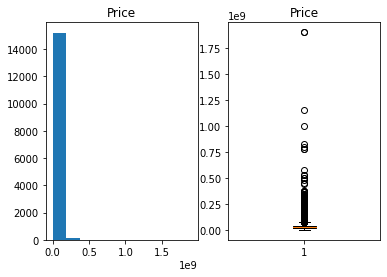

count    1.532700e+04
mean     3.534340e+07
std      4.513401e+07
min      3.600000e+03
25%      1.650000e+07
50%      2.600000e+07
75%      3.950000e+07
max      1.900000e+09
Name: Price, dtype: float64


<Figure size 1152x576 with 0 Axes>

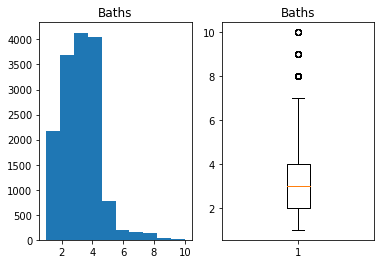

count    15327.000000
mean         2.976251
std          1.362454
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: Baths, dtype: float64


<Figure size 1152x576 with 0 Axes>

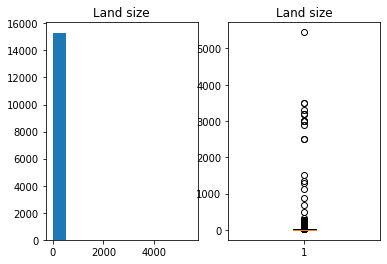

count    15327.000000
mean        16.726143
std        102.990449
min          0.000000
25%          7.800000
50%         10.000000
75%         14.150000
max       5445.000000
Name: Land size, dtype: float64


<Figure size 1152x576 with 0 Axes>

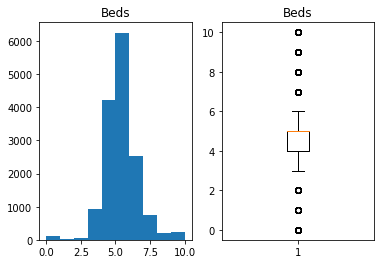

count    15327.000000
mean         4.915052
std          1.236684
min          0.000000
25%          4.000000
50%          5.000000
75%          5.000000
max         10.000000
Name: Beds, dtype: float64


<Figure size 1152x576 with 0 Axes>

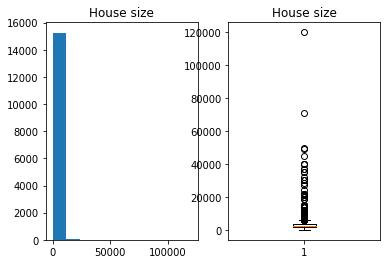

count     15327.000000
mean       2770.713588
std        2194.920377
min           0.000000
25%        1650.000000
50%        2500.000000
75%        3300.000000
max      120000.000000
Name: House size, dtype: float64


<Figure size 1152x576 with 0 Axes>

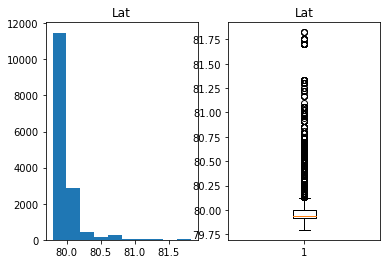

count    15327.000000
mean        79.979304
std          0.177783
min         79.795675
25%         79.913892
50%         79.940789
75%         80.000000
max         81.822554
Name: Lat, dtype: float64


<Figure size 1152x576 with 0 Axes>

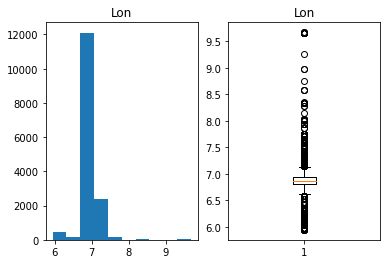

count    15327.000000
mean         6.908008
std          0.243448
min          5.941424
25%          6.801844
50%          6.866670
75%          6.935757
max          9.673491
Name: Lon, dtype: float64


In [440]:
for c in ['Price', 'Baths', 'Land size', 'Beds', 'House size', 'Lat', 'Lon',]:
    plt.figure(figsize=(16,8))
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.hist(x=data[c])
    ax1.set_title(c)
    ax2.boxplot(x=data[c])
    ax2.set_title(c)
    plt.show()
    print(data[c].describe())
    
    

In [467]:
min(data.Price)

3600.0

In [441]:
c = ['Price', 'Baths', 'Land size', 'Beds', 'House size', 'Lat', 'Lon',]
Q1 = data[c].quantile(0.25)
Q3 = data[c].quantile(0.75)
IQR = Q3 - Q1

data = data[~((data[c] < (Q1 - 1.5 * IQR)) |(data[c] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [442]:
df

,Price,Baths,Land size,Beds,House size,Lat,Lon,Hour,Minute,Seconds,...,City_Warakapola,City_Wariyapola,City_Wattala,City_Wattegama,City_Weligama,City_Welimada,City_Wellampitiya,City_Wellawaya,City_Wennappuwa,City_Yatiyantota
1,16800000.0,3.0,8.0,4,1480.0,79.989929,6.877246,7,27,0,...,0,0,0,0,0,0,0,0,0,0
2,20000000.0,2.0,20.0,4,2800.0,79.914926,6.951178,17,19,0,...,0,0,0,0,0,0,0,0,0,0
4,1300000.0,1.0,6.3,3,900.0,79.880242,6.838232,17,6,0,...,0,0,0,0,0,0,0,0,0,0
5,55000000.0,4.0,11.0,5,3300.0,80.016670,6.866670,17,4,0,...,0,0,0,0,0,0,0,0,0,0
7,16700000.0,3.0,9.0,4,1400.0,79.922703,6.801844,16,56,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15320,16500000.0,3.0,10.1,4,2300.0,80.016670,6.866670,11,14,0,...,0,0,0,0,0,0,0,0,0,0
15323,70000000.0,2.0,7.0,4,1100.0,79.880242,6.838232,21,8,0,...,0,0,0,0,0,0,0,0,0,0
15324,44000000.0,4.0,20.0,6,2750.0,79.923272,6.851146,0,26,0,...,0,0,0,0,0,0,0,0,0,0
15325,15000000.0,2.0,5.0,3,1350.0,79.880242,6.838232,21,12,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1152x576 with 0 Axes>

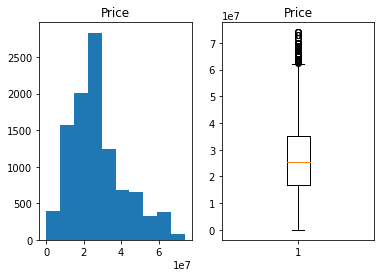

count    1.016800e+04
mean     2.744559e+07
std      1.421338e+07
min      3.600000e+03
25%      1.700000e+07
50%      2.550000e+07
75%      3.500000e+07
max      7.400000e+07
Name: Price, dtype: float64


<Figure size 1152x576 with 0 Axes>

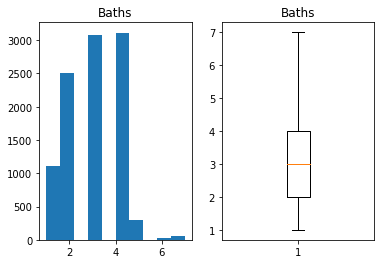

count    10168.000000
mean         2.929386
std          1.097100
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Baths, dtype: float64


<Figure size 1152x576 with 0 Axes>

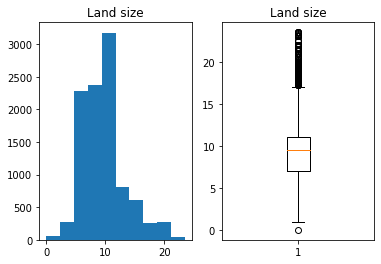

count    10168.000000
mean         9.639545
std          3.537231
min          0.000000
25%          7.000000
50%          9.500000
75%         11.000000
max         23.500000
Name: Land size, dtype: float64


<Figure size 1152x576 with 0 Axes>

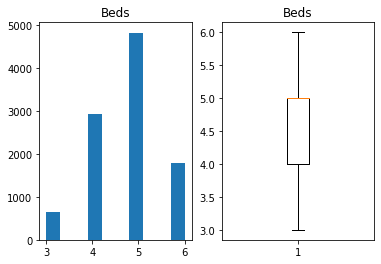

count    10168.000000
mean         4.760917
std          0.813708
min          3.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          6.000000
Name: Beds, dtype: float64


<Figure size 1152x576 with 0 Axes>

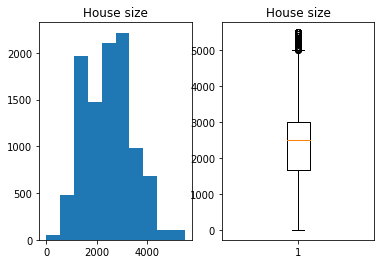

count    10168.000000
mean      2459.059880
std        942.757059
min          0.000000
25%       1658.000000
50%       2500.000000
75%       3000.000000
max       5500.000000
Name: House size, dtype: float64


<Figure size 1152x576 with 0 Axes>

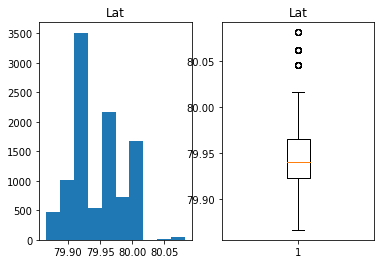

count    10168.000000
mean        79.946855
std          0.040354
min         79.866418
25%         79.922703
50%         79.940789
75%         79.965234
max         80.081711
Name: Lat, dtype: float64


<Figure size 1152x576 with 0 Axes>

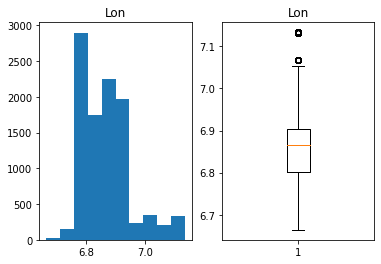

count    10168.000000
mean         6.871148
std          0.079002
min          6.663973
25%          6.801844
50%          6.866670
75%          6.904072
max          7.133330
Name: Lon, dtype: float64


In [443]:
for c in ['Price', 'Baths', 'Land size', 'Beds', 'House size', 'Lat', 'Lon',]:
    plt.figure(figsize=(16,8))
    f, (ax1, ax2) = plt.subplots(1, 2)
    ax1.hist(x=data[c])
    ax1.set_title(c)
    ax2.boxplot(x=data[c])
    ax2.set_title(c)
    plt.show()
    print(data[c].describe())
    
    

In [415]:
data.isna().sum()

Price                1197
Baths                1227
Land size            1982
Beds                 2243
House size           1397
                     ... 
City_Welimada        1201
City_Wellampitiya    1347
City_Wellawaya       1198
City_Wennappuwa      1204
City_Yatiyantota     1200
Length: 210, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15327 entries, 0 to 15326
Columns: 210 entries, Price to City_Yatiyantota
dtypes: float64(210)
memory usage: 24.6 MB


In [315]:
for i in data.columns:
    pass# print(i,data[i].nunique(),data[i].dtype)

In [444]:
for c in data.columns:
    if data[c].isnull().sum() > 0:
        print(c,data[c].isnull().sum())

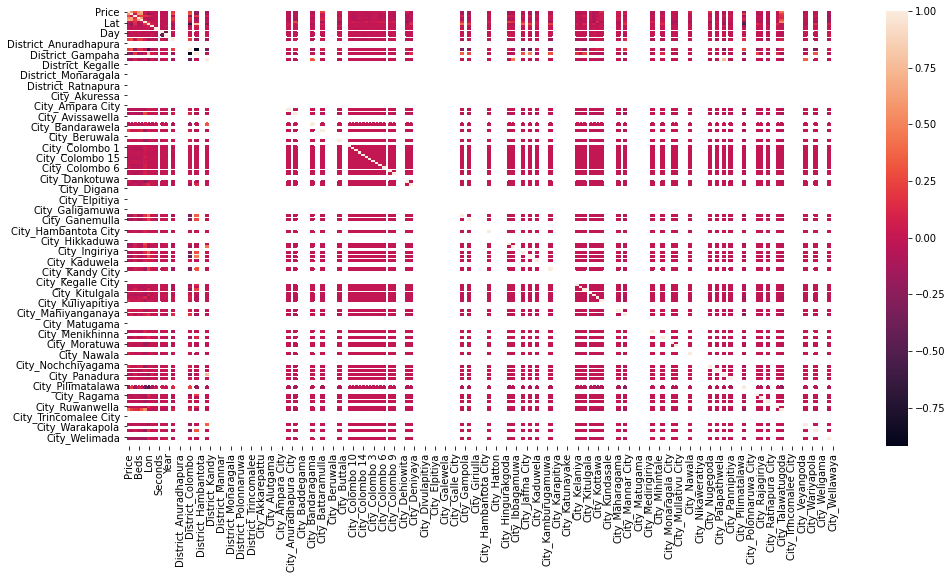

In [445]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr())
plt.show()

In [446]:
X = data.drop('Price',1)
y = data['Price']

In [447]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X = MinMaxScaler().fit_transform(X)

In [448]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


from sklearn.svm import SVC

In [449]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=26,test_size=.25)

In [450]:
model = SVC()
model.fit(train_x,train_y)

SVC()

In [451]:
pred = model.predict(test_x)

In [452]:
model.score(test_x, test_y)

0.1966955153422502

In [453]:
print("MAE:",mean_absolute_error(test_y,pred))
print("MSE:",mean_squared_error(test_y,pred))
print("MSLE:",mean_squared_log_error(test_y,pred))

MAE: 5945008.260818253
MSE: 87570355502989.77
MSLE: 0.14727187936446964


In [454]:
temp = pd.DataFrame()
temp['price'] = test_y
temp['pred'] = pred

In [455]:
temp

,price,pred
10273,21000000.0,32000000.0
12336,66960000.0,13500000.0
2569,32000000.0,7500000.0
5890,42000000.0,45000000.0
13666,27500000.0,25500000.0
...,...,...
3379,14000000.0,14000000.0
6486,13500000.0,14000000.0
14707,16000000.0,16000000.0
8606,17500000.0,17500000.0


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


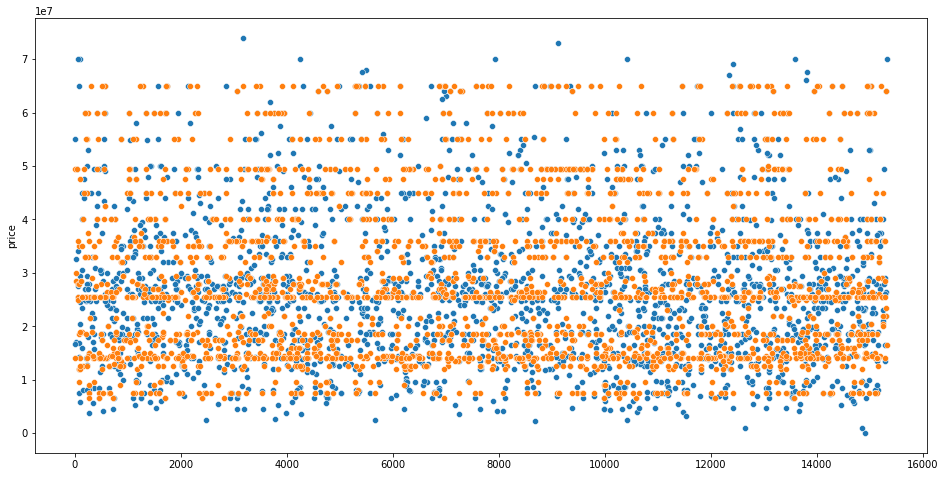

In [462]:
plt.figure(figsize=(16,8))
sns.scatterplot(temp.index,temp['price'])
sns.scatterplot(temp.index,temp['pred'])
plt.show()

In [463]:
data.to_csv('data.csv',index=False)